 Ciência dos Dados - PROJETO 1

## Arthur Quintella de Mello Olga

# Análise de Segurança Alimentar por Região, Renda e Tipo de Moradia

___
## Introdução

Esse projeto visa analisar um antigo problema brasileiro que se alastra por boa parte da populaçao, a Segurança Alimentar, buscando equacionar variaveis como renda, regiao e avanço de seguraça alimentar ao longo do tempo para que se tenha uma melhor ideia de quais sao as pessoas que passam fome e seus perfis. Assim, uma campanhia de combate contra a fome seria feita de uma forma mais eficiente e focada.

___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\arthu\Downloads


In [3]:
dados = pd.read_csv('DOM2013.csv')


##  Pessoas por Região

dados.loc[(dados.UF>10)&(dados.UF<20),'REGIAO']='Norte'
dados.loc[(dados.UF>20)&(dados.UF<30),'REGIAO']='Nordeste'
dados.loc[(dados.UF>30)&(dados.UF<40),'REGIAO']='Sudeste'
dados.loc[(dados.UF>40)&(dados.UF<50),'REGIAO']='Sul'
dados.loc[(dados.UF>50),'REGIAO']='Centro-Oeste'

dados.REGIAO = dados.REGIAO.astype('category')


##  Pessoas que já tiveram algum problema em relação à comida como excassez parcial ou total e situações de limite

dados.loc[(dados.V2103==1)|(dados.V2105==1)|(dados.V2107==1)|(dados.V2109==1),"FOME"]="Sim"
dados.loc[(dados.V2103==3)&(dados.V2105==3)&(dados.V2107==3)&(dados.V2109==3),"FOME"]="Não"
dados.loc[(dados.V2103!=1) & (dados.V2103!=3),"FOME"]="Sem Reposta"


dados.FOME = dados.FOME.astype('category')

##  Renda domiciliar dividida em salários mínimos

dados.loc[(dados.V4622 == 0),'Salários_Mínimos']=0
for i in range(1,7):
    dados.loc[(dados.V4622 == i),'Salários_Mínimos']=str(0.5*i)

dados.Salários_Mínimos = dados.Salários_Mínimos.astype('category')



#  Quantidade de banheiros


dados = dados.rename(columns = {'V2016':'BANHEIROS'})
dados.loc[(dados.V0215 == 3),'BANHEIROS'] = 0

# Salário Bruto

dados = dados.rename(columns = {'V4614':'RENDA_BRUTA'})






# Movendo para um novo dataframe
#dados.columns
df = dados.loc[:, ['REGIAO','FOME','Salários_Mínimos','RENDA_BRUTA','BANHEIROS']]

df= df.dropna(axis=0)

#df.QUANT_BANH






In [4]:
df.to_csv("Dados2013")

cmap3 = "nipy_spectral"
cmapv = "viridis"

# Gráficos

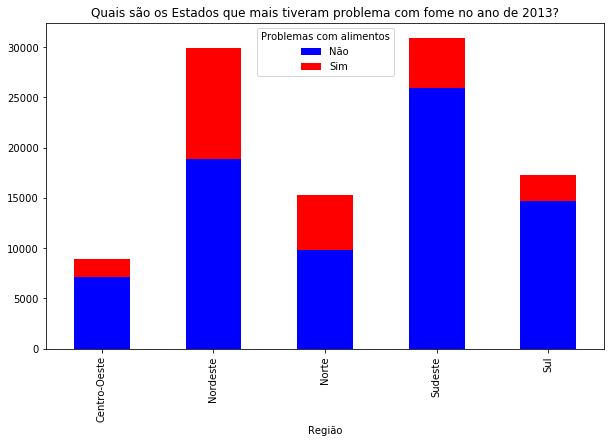

In [5]:


ctab = (pd.crosstab(df.REGIAO,df.FOME,margins=True,rownames=['Região'], colnames=['Problemas com alimentos']))
plot = ctab.iloc[0:5,[0,1]].plot(kind='bar',color=["blue","red"],title="Quais são os Estados que mais tiveram problema com fome no ano de 2013?",stacked=True,figsize=(10, 6))


## O Gráfico mostra que a região com mais problemas relacionados à comida foi o Nordeste. Portanto, é interessante analisar essa região, assim como seria também a Norte, porém, é interessante observar que a população absoluta do Nordeste é maior, portanto mais interessante para um maior alcance da campanha a favor da Segurança Alimentar.

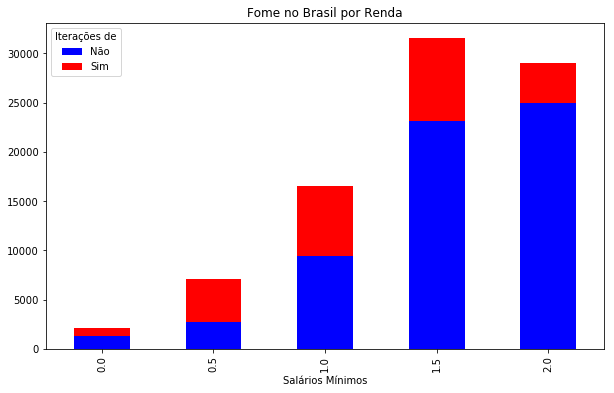

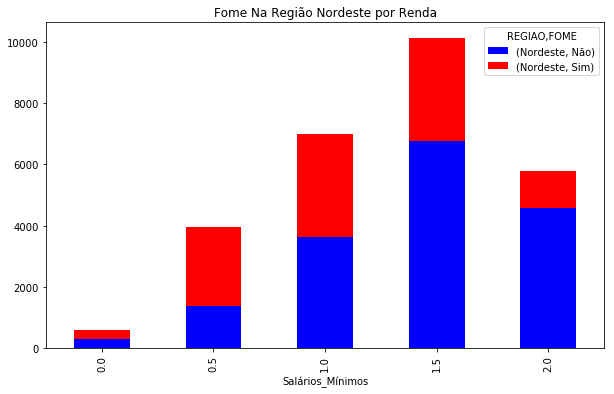

In [6]:
# Fome no Brasil por Renda


ctabr = pd.crosstab(df.Salários_Mínimos,df.FOME,margins=True,rownames=['Salários Mínimos'], colnames=["Iterações de"])
plt.plot = ctabr.iloc[:5,0:2].plot(kind="bar",color=["blue","red"],title="Fome no Brasil por Renda",stacked=True,figsize=(10,6))



# Fome na regiao Nodeste por Renda
ctab = pd.crosstab(df.Salários_Mínimos,[df.REGIAO,df.FOME],margins=True)

ctab.iloc[:5,2:4].plot(kind="bar",color =["blue","red"],stacked=True,title="Fome Na Região Nordeste por Renda",figsize=(10, 6))





## É possivel notar que o gráfico do Nordeste se diferencia muito do gráfico brasileiro geral, principalmente pela drástica diminuição de pessoas com salários maiores que 1.5 salários mínimos. Além disso, pelas áreas do grpafico, é possível notar que a maior presença de fome se encontra nas camadas de 0.5,1.0 e 1.5 salários mínimos.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002343610C3C8>], dtype=object)

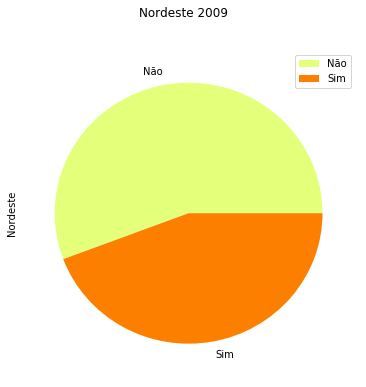

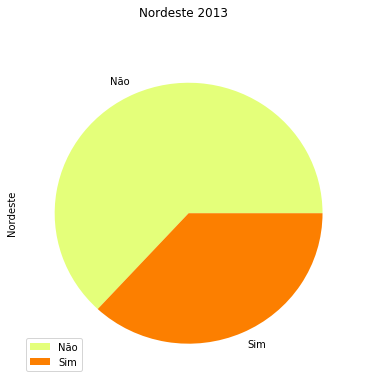

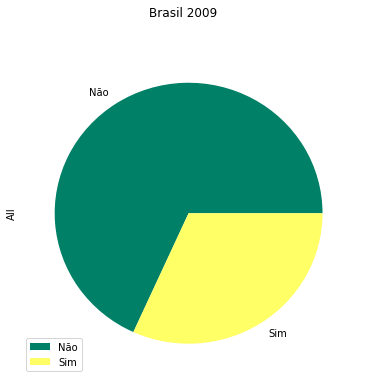

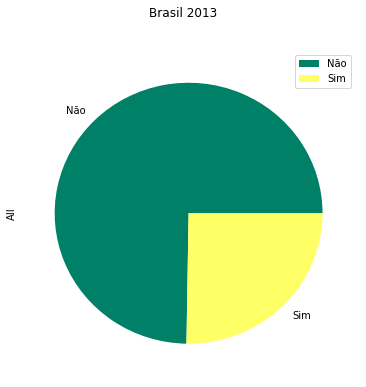

In [7]:
# comparação da melhoria de Segurança alimentar entre 2009 e 2013


# Definindo 2009

dados = pd.read_csv('DOM2009.csv')

dados.loc[(dados.UF>10)&(dados.UF<20),'REGIAO']='Norte'
dados.loc[(dados.UF>20)&(dados.UF<30),'REGIAO']='Nordeste'
dados.loc[(dados.UF>30)&(dados.UF<40),'REGIAO']='Sudeste'
dados.loc[(dados.UF>40)&(dados.UF<50),'REGIAO']='Sul'
dados.loc[(dados.UF>50),'REGIAO']='Centro-Oeste'

dados.REGIAO = dados.REGIAO.astype('category')


dados.loc[(dados.V2103==1)|(dados.V2105==1)|(dados.V2107==1)|(dados.V2109==1),"FOME"]="Sim"
dados.loc[(dados.V2103==3)&(dados.V2105==3)&(dados.V2107==3)&(dados.V2109==3),"FOME"]="Não"
dados.loc[(dados.V2103!=1) & (dados.V2103!=3),"FOME"]="Sem Reposta"





#  Fome X Regiao   em 2009 e 2013

ctab2009 = pd.crosstab(dados.FOME,dados.REGIAO,normalize=False,margins=True)
ctab2013 = pd.crosstab(df.FOME,df.REGIAO,normalize=False,margins=True)

plot = ctab2009.iloc[[0,2],[1]].plot(kind="pie",colormap="Wistia",title="Nordeste 2009",subplots=True,figsize=(6, 6))
plot = ctab2013.iloc[:3,[1]].plot(kind="pie",colormap="Wistia",title="Nordeste 2013",subplots=True,figsize=(6, 6))

ctab2009.iloc[[0,2],[5]].plot(kind="pie",colormap="summer",title="Brasil 2009",subplots=True,figsize=(6, 6),legend=True)
ctab2013.iloc[:3,[5]].plot(kind="pie",colormap="summer",title="Brasil 2013",subplots=True,figsize=(6, 6),legend=True)

## É possível notar nos gráficos acima que a fome diminuiu no Brasil em relação de 2009 para 2013, porém no Nordeste é possível ver que essa diminuição foi menos expressiva, fato que torna a região um ótimo local de estudo para decidir a maneira em que a campanha pode tomar forma.

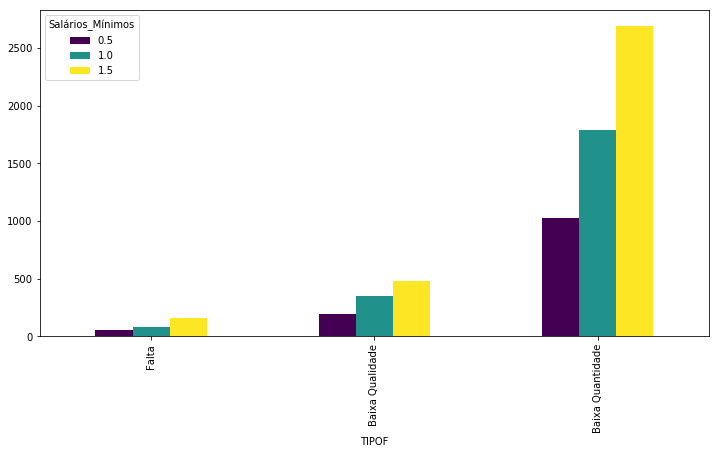

In [8]:

df.loc[(dados.V2103!=1)&(dados.V2105!=1)&(dados.V2107!=1)&(dados.V2107!=1)&(dados.REGIAO=="Nordeste"),"TIPOF"]= 0
df.loc[(dados.V2103==1)&(dados.REGIAO=="Nordeste"),"TIPOF"]= 1
df.loc[(dados.V2105==1)&(dados.REGIAO=="Nordeste"),"TIPOF"]= 2
df.loc[(dados.V2107==1)&(dados.REGIAO=="Nordeste"),"TIPOF"]= 3
df.loc[(dados.V2109==1)&(dados.REGIAO=="Nordeste"),'TIPOF']= 4


df.TIPOF= df.TIPOF.astype('category')
df.TIPOF.cat.categories = (["Nada",'Preocupação com falta de alimentos', 'Falta', 'Baixa Qualidade','Baixa Quantidade'])


ctab = pd.crosstab(df.TIPOF,df.Salários_Mínimos,margins=True)




plt.plot = ctab.iloc[2:5,1:4].plot(kind="bar",colormap=cmapv,figsize=(12, 6))
#plt.set_facecolor('black')
#print(, uma vez que esse é o problema que mais permeia.") 

## O gráfico mostra que se uma companhia de apoio à segurança alimentar tivesse a intenção de atingir a maior parte da população com problema alimentares, deveria focar em domicilios com problemas de baixa quantidade de alimentos no Nordeste.

___
## Conclusão 

# A partir desse gráficos é possível concluir que a campanha com o objetivo de atingir um maior número de pessoas teria como público alvo moradores da região Nordeste com problemas de baixa qualidade de alimentação e renda domiciliar de em torno de 1,5 salários mínimos. Uma vez que: 

#  1. A Região Nordeste abriga a parcela da população brasileira com mais problemas de renda e fome

#  2. De 2009 para 2013 a Região Nordeste teve problemas alimentares reduzidos em uma proporção menor em relação ao Brasil como um todo.

#  3. Dentre todos os tipos de problemas de alimentação observados pelo PNAD, a baixa quantidade de alimentos é a mais presente

#  4. Ao observar a baixa quantidade de alimentos em relação à renda domiciliar, podemos perceber que o problema se encontra mais presente nos domicilios com em torno de 1,5 salários mínimos de renda.